In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\COGNITIVE CLASS\PYTHON FOR DATA SCIENCE\onlinefoods.csv")
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [3]:
df.drop(columns='Unnamed: 12', inplace=True)

In [4]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [5]:
df.shape

(388, 12)

In [6]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [7]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Output', 'Feedback'],
      dtype='object')

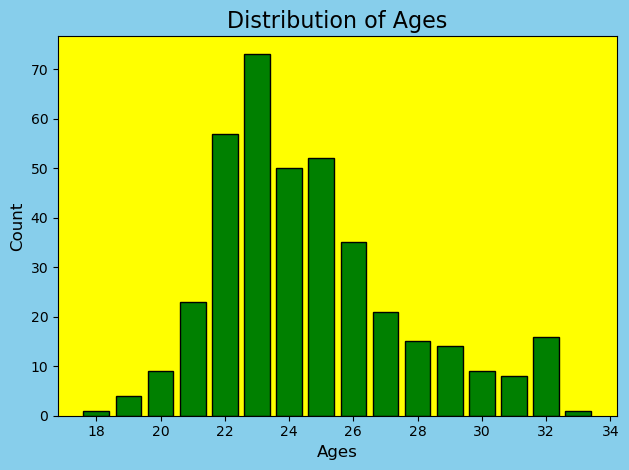

In [8]:
age_counts = df['Age'].value_counts().sort_index()

plt.bar(age_counts.index, age_counts.values, color='green', edgecolor='black')
plt.title('Distribution of Ages', fontsize=16)
plt.xlabel('Ages', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.gcf().patch.set_facecolor('skyblue')
plt.gca().set_facecolor('yellow')
plt.show()

In [9]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Marital Status'], df['Educational Qualifications'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 55.917538967818274
p-value: 2.927091109293357e-09
Degrees of freedom: 8
Expected frequencies table:
[[4.92680412e+01 6.40206186e+00 4.84329897e+01 3.34020619e+00
  5.56701031e-01]
 [5.47422680e+00 7.11340206e-01 5.38144330e+00 3.71134021e-01
  6.18556701e-02]
 [1.22257732e+02 1.58865979e+01 1.20185567e+02 8.28865979e+00
  1.38144330e+00]]


In [10]:
pd.DataFrame(df.groupby('Monthly Income'))[0]

0     10001 to 25000
1     25001 to 50000
2     Below Rs.10000
3    More than 50000
4          No Income
Name: 0, dtype: object

In [11]:
df.loc[df['Monthly Income'] == '10001 to 25000', 'Monthly Income'] = 17500
df.loc[df['Monthly Income'] == '25001 to 50000', 'Monthly Income'] = 37500
df.loc[df['Monthly Income'] == 'Below Rs.10000', 'Monthly Income'] = 10000
df.loc[df['Monthly Income'] == 'More than 50000', 'Monthly Income'] = 50000
df.loc[df['Monthly Income'] == 'No Income', 'Monthly Income'] = 0

In [12]:
df['Monthly Income'] = df['Monthly Income'].astype(int)

In [13]:
pd.DataFrame(df.groupby('Marital Status')['Monthly Income'].mean().sort_values(ascending=False))

,Monthly Income
Marital Status,
Married,34884.259259
Prefer not to say,30625.000000
Single,9664.179104


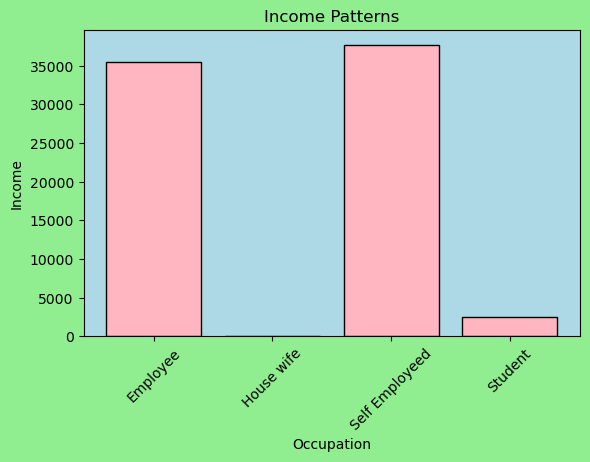

In [14]:
income_pattern = df.groupby('Occupation')['Monthly Income'].mean()

plt.figure(figsize=(6,4))
plt.bar(income_pattern.index, income_pattern.values, color='lightpink', edgecolor='black')
plt.title('Income Patterns')
plt.xlabel('Occupation')
plt.ylabel('Income')
plt.tight_layout()
plt.xticks(rotation=45)
plt.gcf().patch.set_facecolor('lightgreen')
plt.gca().set_facecolor('lightblue')
plt.show()

In [15]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,0,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,0,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Monthly Income'), df['Monthly Income'], test_size=0.2, random_state=42)

In [18]:
pd.DataFrame(X_train).head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
63,23,Male,Single,Student,Graduate,4,12.9343,77.6044,560029,Yes,Positive
238,27,Male,Married,Employee,Graduate,2,12.8845,77.6036,560076,Yes,Positive
132,23,Male,Single,Student,Post Graduate,2,13.0019,77.5713,560003,Yes,Positive
101,23,Male,Single,Student,Post Graduate,2,12.9442,77.6076,560030,Yes,Positive
351,25,Male,Single,Self Employeed,Graduate,2,12.9783,77.6408,560038,Yes,Positive


In [19]:
X_train.shape

(310, 11)

In [20]:
numerical_columns = [0, 5, 6, 7, 8]
cat_nominal = [1, 2, 3]
cat_ordinal = [5, 9, 10]

In [21]:
handle_numerical = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean'))
])

In [22]:
handle_nominal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(drop='first'))
])

In [23]:
handle_ordinal = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OrdinalEncoder())
])

In [24]:
preprocessing = ColumnTransformer(transformers=[
    ('numerical', handle_numerical, numerical_columns),
    ('nominal', handle_nominal, cat_nominal),
    ('ordinal', handle_ordinal, cat_ordinal)
])

In [25]:
model = LinearRegression()

In [26]:
pipe = make_pipeline(preprocessing, model)

In [27]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer())]),
                                                  [0, 5, 6, 7, 8]),
                                                 ('nominal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  [1, 2, 3]),
                                                 ('ordinal',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OrdinalEncoder())]),
                                                  [5, 9, 10])])),
                ('linearregression', LinearRegression())])

In [28]:
y_pred = pipe.predict(X_test)

In [29]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)

Mean Absolute Error (MAE): 6679.056589923922
Mean Squared Error (MSE): 86780623.09970137
R-squared (R2) Score: 0.7568063975409566
